In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
%matplotlib inline

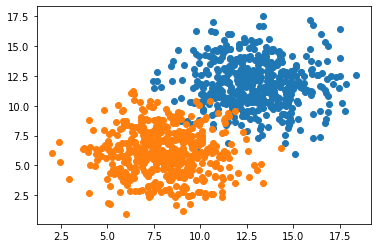

In [4]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
                np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
                np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [5]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam=Adam(lr = 0.1 )
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=Y, verbose=1, batch_size=50,epochs=500, shuffle='true')

Epoch 1/500


2022-08-19 02:56:08.794739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 02:56:08.800802: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2022-08-19 02:56:08.801590: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-08-19 02:56:08.801605: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required

20/20 [==============================] - 1s 2ms/step - loss: 4.8582 - accuracy: 0.4960
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 1.2856 - accuracy: 0.4400
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.6100
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7270
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7840
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8480
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8760
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.9020
Epoch 9/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.9310
Epoch 10/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2945 - accuracy: 0.9300
Epoch 11/500
20/20 [=

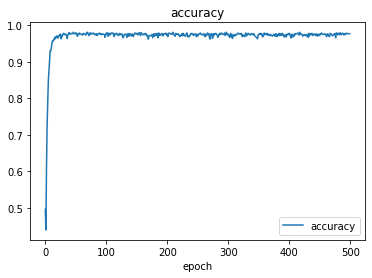

In [6]:
plt.plot( h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

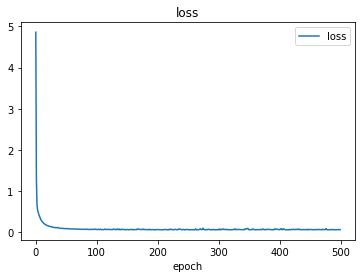

In [7]:
plt.plot( h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [22]:
from turtle import shape


def plot_decision_boundary(X,Y,model):
    x_span = np.linspace(min(X[:,0])-1,max(X[:,0])+1)
    y_span = np.linspace(min(X[:,1]) - 1 ,max(X[:,1]) + 1 )
    
    xx, yy = np.meshgrid(x_span,y_span) 
    xx_ , yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

79/79 [==============================] - 0s 1ms/step


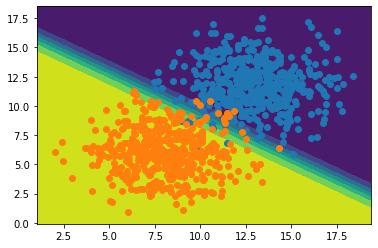

In [24]:
plot_decision_boundary(X,Y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 33ms/step
Prediction is: [[0.9999909]]


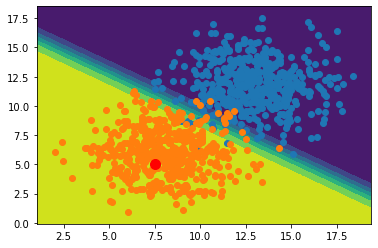

In [27]:
plot_decision_boundary(X,Y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker="o",markersize = 10,color ="red")
print("Prediction is:",prediction)